<a href="https://colab.research.google.com/github/sokungz01/linearAlgebraProject/blob/main/LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project
This project is a part of `MTH234 : Linear Algebra` group project.

Data source : [สถิติรายได้และรายจ่ายเฉลี่ยของครัวเรือนในประเทศไทย ปี 2564](http://statbbi.nso.go.th/staticreport/page/sector/th/08.aspx)

Github Link : [LA-Project](https://github.com/sokungz01/linearAlgebraProject)

Our members

| Student ID  | Name                     |
|-------------|--------------------------|
| 65070501039 | [Pongpon Butseemart](https://github.com/Pongpon00)       |
| 65070501055 | [Sorrawit Udomwittayakrai](https://github.com/SorrawitUdom) |
| 65070501082 | [Pattaranun Ayaprasitphol](https://github.com/efmuruk) |
| 65070501083 | [Panurut Sirinapaisan](https://github.com/sokungz01)     |
| 65070501088 | Sopida Keawjongkul       |

# Setup Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [ ]:
plt.style.use('https://raw.githubusercontent.com/dhaitz/matplotlib-stylesheets/master/pacoty.mplstyle')

In [ ]:
!gdown 14hVF4EM0x4gaaRJ5pmdphq_Y5ZBn4DpY
dataName = "incomeThailand"
df = pd.read_csv(f'{dataName}.csv')

Downloading...
From: https://drive.google.com/uc?id=14hVF4EM0x4gaaRJ5pmdphq_Y5ZBn4DpY
To: /content/incomeThailand.csv
100% 1.47k/1.47k [00:00<00:00, 5.16MB/s]


# Data calculation




ข้อมูลที่นำมาใช้

In [ ]:
print(df)

      income   expense
0   40200.77  31866.68
1   32913.65  27484.76
2   41129.42  33995.57
3   39506.99  31639.92
4   31416.10  25326.92
..       ...       ...
72  24457.23  18296.68
73  24084.10  17578.04
74  20691.69  15392.67
75  19181.87  14927.64
76  17512.02  17088.68

[77 rows x 2 columns]


ค่าความแปรปรวนของข้อมูล (Sample Variance) จาก

$$
\begin{aligned}
\sigma_{x}^{2} &= \frac{1}{N-1}\Sigma_{i=1}^{N}(X_{i}-\mu)^{2} \\
               &= E[(x-E(x))(x-E(x))] \\
               &= \sigma(x,x)
\end{aligned}
$$

---

และค่าความแปรปรวนร่วมของข้อมูล (Covarince) จาก

$$ \sigma(x,y) = \frac{E[(x-E(x))(y-E(y))]}{N-1}$$


ทำการสร้าง Covariance Matrix
โดย Covariance matrix จะนิยามโดย
  $$\Sigma = [\begin{matrix} \sigma(x,x) & \sigma(x,y) \\ \sigma(y,x) & \sigma(y,y)  \end{matrix}]$$


---


และจะนิยามให้ $$\sigma(x,y) = \sigma(y,x)$$

In [ ]:
cov_df = df.cov()
print(cov_df)
print()
print('σ(X,X) : %.3f'%(cov_df.loc['income','income']))
print('σ(X,Y) : %.3f'%(cov_df.loc['income','expense']))
print('σ(Y,X) : %.3f'%(cov_df.loc['expense','income']))
print('σ(Y,Y) : %.3f'%(cov_df.loc['expense','expense']))

               income       expense
income   3.320436e+07  2.440200e+07
expense  2.440200e+07  2.143782e+07

σ(X,X) : 33204355.905
σ(X,Y) : 24401995.494
σ(Y,X) : 24401995.494
σ(Y,Y) : 21437819.452


คำนวณค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐาน จากการเก็บค่า x_data จากคอลัมน์ income(รายได้) และ y_data จากคอลัมน์ expense(รายจ่าย)
จากนั้นเก็บค่าด้วยฟังก์ชั่น

```
numpy.cov()
```
และทำการแสดงผลค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐานของรายได้และรายจ่าย


In [ ]:
x_data = df['income']
y_data = df['expense']
meanIncome,stdIncome = norm.fit(x_data)
meanExpense, stdExpense = norm.fit(y_data)

print('Income  >> mean = %.3f, std = %.3f'%(meanIncome,stdIncome))
print('Expense >> mean = %.3f, std = %.3f'%(meanExpense,stdExpense))

Income  >> mean = 24666.334, std = 5724.782
Expense >> mean = 19499.892, std = 4599.935


ทำการพลอตกราฟฮิสโตแกรมและการแจกแจงแบบปกติ เพื่อแสดงการกระจายตัวของข้อมูลสองชุด โดย Fig.1 เป็นกราฟที่แสดงถึงการกระจายตัวของข้อมูลรายรับ และ Fig.2 เป็นกราฟที่แสดงถึงการกระจายตัวของข้อมูลรายจ่าย

## Fig. [1][2] Gaussian function

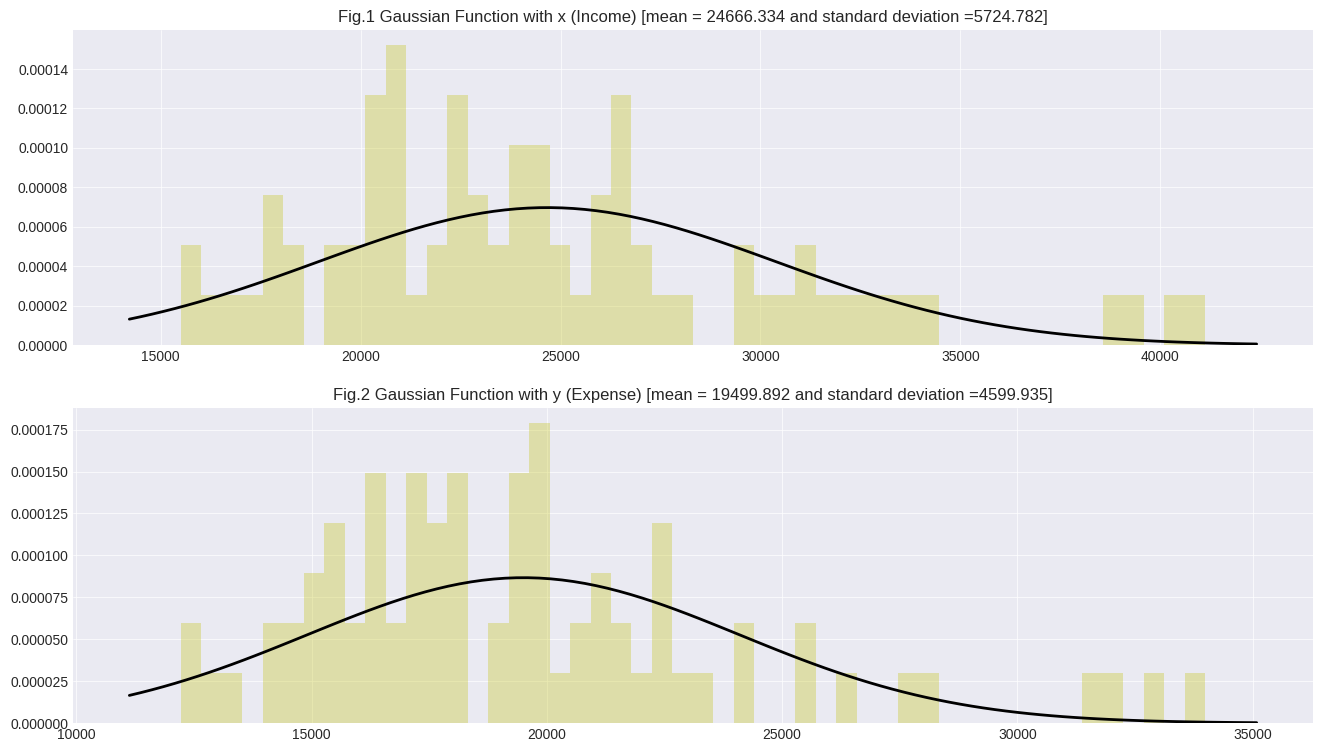

In [ ]:
plt.figure(figsize=(16,9))
#FIGURE 1
plt.subplot(2,1,1)
plt.hist(x_data,bins= 50,density=True,alpha = 0.3, color='y')
xmin, xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x, meanIncome, stdIncome)
plt.plot(x,p,'k',linewidth=2)
plt.title('Fig.1 Gaussian Function with x (Income) [mean = %.3f and standard deviation =%.3f]'%(meanIncome,stdIncome))
plt.grid(linewidth=0.5)

#FIGURE 2
plt.subplot(2,1,2)
plt.hist(y_data,bins=50,density=True,alpha = 0.3, color='y')
xmin, xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x, meanExpense, stdExpense)
plt.plot(x,p,'k',linewidth=2)
plt.title('Fig.2 Gaussian Function with y (Expense) [mean = %.3f and standard deviation =%.3f]'%(meanExpense,stdExpense))
plt.grid(linewidth=0.5)

ทำการแสดงผล Covariance matrix ของข้อมูลและเรียกใช้ฟังก์ชั่น plt เพื่อเรียกใช้ฟังก์ชั่นต่าง ๆ สำหรับการพล็อตกราฟ
ด้วยการป้อนข้อมูลต่าง ๆ เกี่ยวกับกราฟ ได้แก่ ชื่อกราฟ กำหนดชื่อและป้อนข้อมูลแกนใน x และ y

## Fig. [3] Scatter plot of data

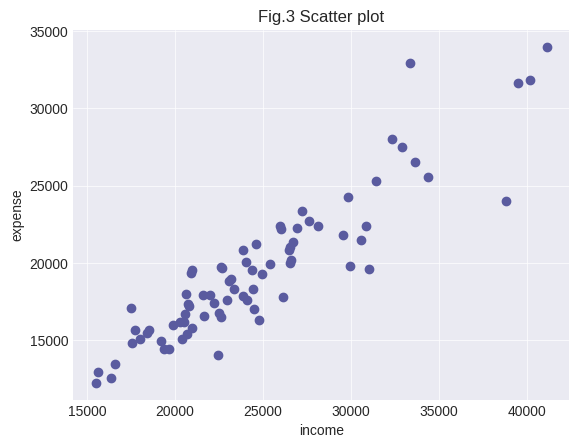

In [ ]:
plt.title('Fig.3 Scatter plot')
plt.xlabel('income')
plt.ylabel('expense')
plt.grid(linewidth=0.5)
plt.scatter(x_data,y_data)
plt.show()

สร้างตัวอย่างการแจกแจงปกติของข้อมูล โดยมีการคำนวณจากค่าเฉลี่ยและ Covariance Matrix จากนั้นนำมา plot เป็นกราฟการกระจายตัวของข้อมูลจากค่าเฉลี่ยและสร้าง Trend ข้อมูลให้ถูกต้องจาก Covariance Matrix

## Fig. [4]

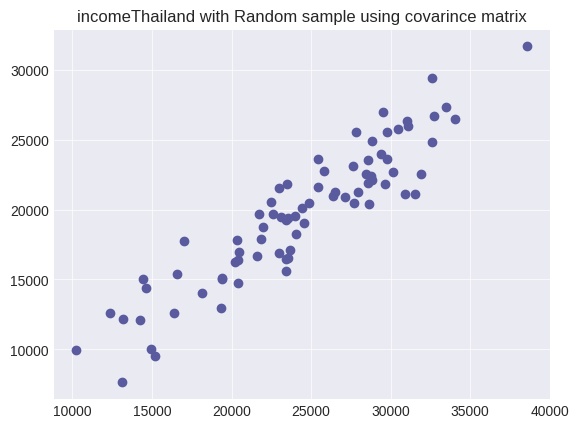

In [ ]:
plt.title('Fig.4')
np.random.seed(0)
sample=np.random.multivariate_normal(mean=df.mean(),cov=cov_df,size=df.shape[0])
col= [f'Sample_{i}' for i in range (sample.shape[1])]
gen_df =pd.DataFrame(sample,columns=col)
plt.scatter(sample[:,0],sample[:,1])
plt.title(f"{dataName} with Random sample using covarince matrix")
plt.grid(linewidth=0.5)

## Fig. [5]

### Calculate Eigenvalue

ทำการคำนวณค่า Eigenvalue และ Eigenvector จาก Covariance matrix


โดยจะสามารถหาค่า Eigenvalue ได้จาก

$$ \begin{align}
A\overrightarrow{x} &= \lambda\overrightarrow{x} \tag{Eq.1}\\  
(A-\lambda I_{n})\overrightarrow{x} &= \overrightarrow{0}_{n} \tag{Eq.2}\\
det(A-\lambda I_{n}) &= 0  \tag{Eq.3}\\
det\left(\begin{bmatrix} a-\lambda & b \\ c & d-\lambda  \end{bmatrix}\right) &= 0 \tag{Eq.4}\\ (a-\lambda)\times (d-\lambda) - b \times c &= 0 \tag{Eq.5}\\
\lambda^{2} - (a+d)\lambda + (ad-bc) &= 0 \tag{Eq.6}\\
 \end{align}
$$

---

 $$  \lambda = \frac{-(-(a+d)) \pm \sqrt{ (-(a+d))^{2} - 4(1)(ad-bc) } }{2(1)}\tag{Eq.7}
 $$



### Calculate Eigenvector

และสามารถหาค่า Eigenvector ได้จาก

$$ (A-\lambda I_{n})\overrightarrow{V} = \overrightarrow{0}_{n} $$

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_df) #this is the function that use to implement all 9 equations above.
print(f'eigenvalues :\n {eigenvalues}')
print(f'eigenvectors : \n{eigenvectors}')

eigenvalues :
 [52422287.43236663  2219887.92396316]
eigenvectors : 
[[ 0.78561503 -0.61871562]
 [ 0.61871562  0.78561503]]


ทำการสร้างกราฟโดยมีการปรับค่าสเกลของข้อมูลโดยเปลี่ยนเป็นค่ามาตรฐานหรือ z-score
จากนั้นทำการ plot ข้อมูลที่ปรับค่าสเกลและ eigen vector ลงกราฟ

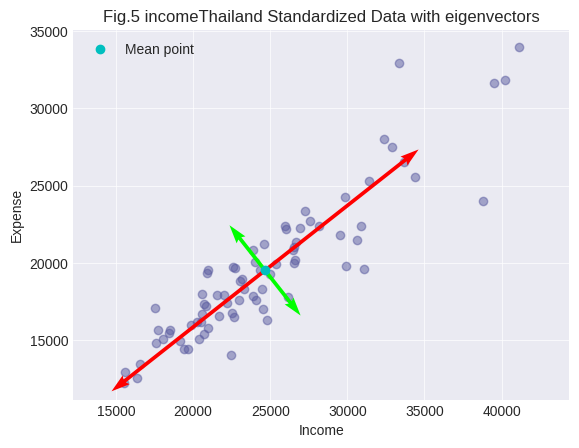

[24666.33428571 19499.89233766]


In [ ]:
plt.title(f"Fig.5 {dataName} Standardized Data with eigenvectors")
meanPoint = np.mean(np.vstack((x_data, y_data)), axis=1)
plt.scatter(x_data,y_data,alpha=0.5)
color = ['red','lime']
scale = [1/(1.75*np.sqrt(eigenvalues[0])),1/(2.5*np.sqrt(eigenvalues[1]))]
for i,(color,scale) in enumerate(zip(color,scale)):
  plt.quiver(meanPoint[0], meanPoint[1], eigenvectors[0, i], eigenvectors[1, i], color=color, scale=scale, angles='xy', scale_units= 'xy')
  plt.quiver(meanPoint[0], meanPoint[1], -eigenvectors[0, i], -eigenvectors[1, i], color=color, scale=scale, angles='xy', scale_units= 'xy')
plt.xlabel('Income')
plt.ylabel('Expense')
plt.plot(meanPoint[0],meanPoint[1],'co',label='Mean point')
plt.grid(linewidth=0.5)
plt.axis('equal')
plt.legend()
plt.show()

print(meanPoint)

# Transformation matrix (Extra)

กำหนดให้ Covariance matrix ตั้งต้นเป็น
$$ \Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$
และข้อมูลที่นำมาใช้ในการทำ White data เป็นการสุ่มสร้างข้อมูลที่มีความสัมพัธ์ระหว่างค่า **Mean** และค่าของ **Covariance Matrix** จากฟังก์ชัน `np.random.multivariate_normal(mean,covarince,size)` โดยมี `np.random.seed(seed)` เป็นค่าตั้งต้นในการสุ่มข้อมูลมาใช้

In [ ]:
mean = [0, 0]

# Set the desired covariance matrix
cov_matrix = [[1, 0], [0, 1]]

np.random.seed(0)
data = np.random.multivariate_normal(mean, cov_matrix, 200)
print(np.cov(data, rowvar=False))

[[ 0.99655338 -0.0427989 ]
 [-0.0427989   0.96228824]]


ต่อมาเราจะทำการสร้างข้อมูลชุดใหม่จาก White Data โดยอ้างอิงจากสมการ
$$ D' = RSD $$
ซึ่งในการศึกษาครั้งนี้เราจะกำหนดให้ค่าของ Rotation matrix R:
$$ R = \begin{bmatrix} cos(60^{o}) & -sin(60^{o}) \\ sin(60^{o}) & cos(60^{o}) \end{bmatrix} $$
และค่าของ Scaling matrix S:
$$ S = \begin{bmatrix} -2 & 0 \\ 0 & -5 \end{bmatrix} $$

ซึ่งทำให้ข้อมูลชุดใหม่เป็นไปดังรูป

$$ D' = \begin{bmatrix} cos(60^{o}) & -sin(60^{o}) \\ sin(60^{o}) & cos(60^{o}) \end{bmatrix} \begin{bmatrix} -2 & 0 \\ 0 & -5 \end{bmatrix} D $$

และเราจะทราบค่าของ Covariance Matrix อันใหม่ที่ผ่านการ Scaling และ Rotation แล้วดังสมการ

$$ \Sigma' = RSSR^{-1} $$

ซึ่งจะสามารถนำไปวิเคราะห์หาแนวโน้มของข้อมูล, Eigenvector และ Eigenvalueได้

In [ ]:
theta = np.radians(60)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s),
              (s, c)))

# scale the data by a scaler matrix
S = np.array([[-2, 0],
              [0, -5]])

# transform the data matrix
# data_t = RSSR^-1
data_t = data.dot(R)
data_t = data_t.dot(S)
data_t = data_t.dot(S)
data_t = data_t.dot(np.linalg.inv(R))
cov_data_t = np.cov(data_t, rowvar=False)
eig_val, eig_vec = np.linalg.eig(cov_data_t)
print("Covariance matrix : \n",cov_data_t)
print("Eigenvalue (data transform) :\n",eig_val)
print("Eigenvector (data transform) :\n",eig_vec)

Covariance matrix : 
 [[ 483.65999427 -271.27147027]
 [-271.27147027  171.93815924]]
Eigenvalue (data transform) :
 [640.6582083   14.93994521]
Eigenvector (data transform) :
 [[ 0.86550055  0.50090797]
 [-0.50090797  0.86550055]]


ภาพกราฟเปรียบเทียบข้อมูล White Data และข้อมูลที่ถูก Transformed จากสมการ
` D' = RSD `

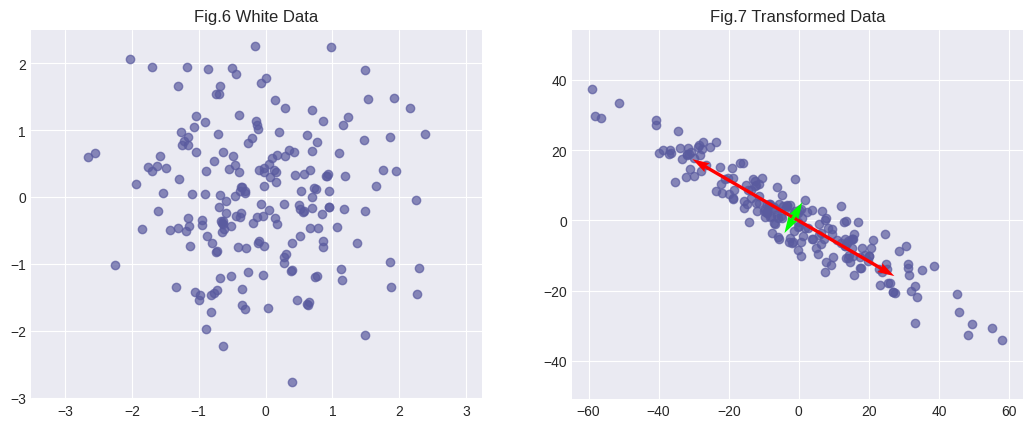

In [ ]:
plt.figure(figsize=(12.8,4.8))
plt.subplot(1,2,1)
plt.title('Fig.6 White Data')
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.axis('equal')

plt.subplot(1,2,2)
plt.title('Fig.7 Transformed Data')
x = data_t[:, 0]
y = data_t[:, 1]
plt.scatter(x, y, alpha=0.7)
# plot arrows
color = ['red','lime']
scale = [np.sqrt(eig_val[1]),np.sqrt(eig_val[0])]
meanPoint = np.mean(np.vstack((x, y)), axis=1)
for i,(color,scale) in enumerate(zip(color,scale)):
  plt.quiver(meanPoint[0], meanPoint[1], eig_vec[0, i], eig_vec[1, i], color=color, scale=scale)
  plt.quiver(meanPoint[0], meanPoint[1], -eig_vec[0, i], -eig_vec[1, i], color=color, scale=scale)
plt.axis('equal')
plt.show()